In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-2020/Data Train.csv
/kaggle/input/customer-churn-2020/Data Test.csv


In [1]:
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as statsmodels

pd.set_option('display.max_columns',None)

## 1. Read Data

In [3]:
dt = pd.read_csv('/kaggle/input/customer-churn-2020/Data Train.csv')
dt.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## 2. Data Exploration

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
def summary_tab(df):
  summary = pd.DataFrame({
      'Kolom': df.columns,
      'dataType': df.dtypes,
      'null' : df.isna().sum(),
      'null_percentage' : round(df.isna().sum()/len(df)*100,2),
      'unique' : df.nunique(),
      'unique_sample' : [list(df[i].drop_duplicates().sample(2)) for i in df.columns]
  })
  summary['unique_%'] = round(summary['unique'] / len(df) * 100,2)
  return summary.reset_index(drop=True)

In [6]:
summary_tab(dt)


,Kolom,dataType,null,null_percentage,unique,unique_sample,unique_%
0,state,object,0,0.0,51,"[CA, OR]",1.20
1,account_length,int64,0,0.0,215,"[72, 48]",5.06
2,area_code,object,0,0.0,3,"[area_code_510, area_code_408]",0.07
3,international_plan,object,0,0.0,2,"[no, yes]",0.05
4,voice_mail_plan,object,0,0.0,2,"[yes, no]",0.05
5,number_vmail_messages,int64,0,0.0,46,"[18, 36]",1.08
6,total_day_minutes,float64,0,0.0,1843,"[83.4, 277.5]",43.36
7,total_day_calls,int64,0,0.0,120,"[55, 52]",2.82
8,total_day_charge,float64,0,0.0,1843,"[32.13, 46.09]",43.36
9,total_eve_minutes,float64,0,0.0,1773,"[174.7, 162.8]",41.72


In [7]:
summary_tab(dt)

,Kolom,dataType,null,null_percentage,unique,unique_sample,unique_%
0,state,object,0,0.0,51,"[NH, NV]",1.20
1,account_length,int64,0,0.0,215,"[164, 36]",5.06
2,area_code,object,0,0.0,3,"[area_code_415, area_code_510]",0.07
3,international_plan,object,0,0.0,2,"[yes, no]",0.05
4,voice_mail_plan,object,0,0.0,2,"[no, yes]",0.05
5,number_vmail_messages,int64,0,0.0,46,"[8, 26]",1.08
6,total_day_minutes,float64,0,0.0,1843,"[126.4, 212.0]",43.36
7,total_day_calls,int64,0,0.0,120,"[74, 156]",2.82
8,total_day_charge,float64,0,0.0,1843,"[40.15, 40.83]",43.36
9,total_eve_minutes,float64,0,0.0,1773,"[129.3, 226.1]",41.72


### 2.1 EDA

In [8]:
categ_columns = []
for col in dt.columns:
	if dt[col].nunique()<10:
		categ_columns.append(col) 
        
print('category columns are {}'.format(categ_columns))

numerical = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
print('nums numericals columns are {}'.format(numerical))

category columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn']
nums numericals columns are ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


In [9]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

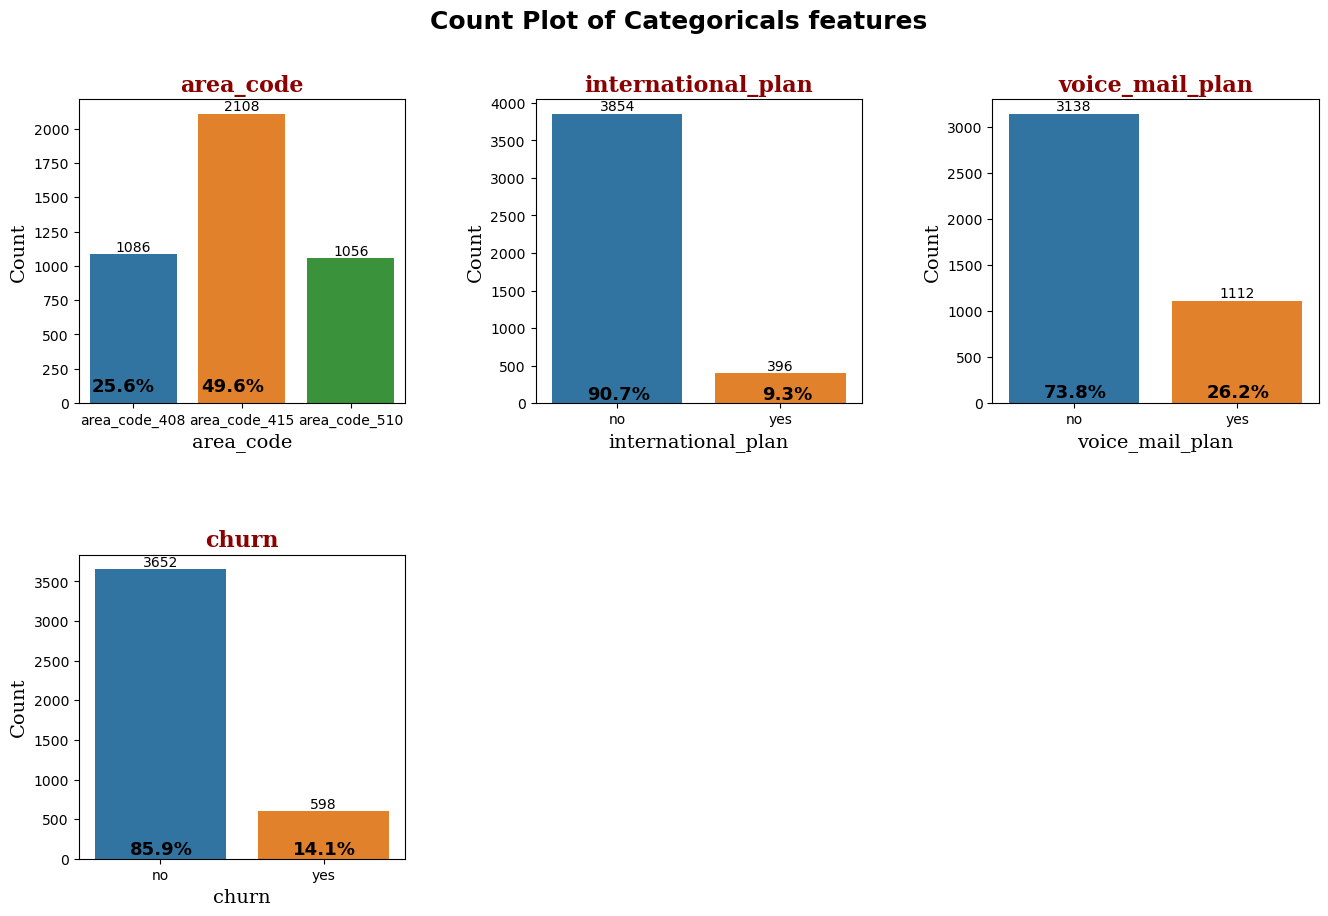

In [10]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(dt[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])

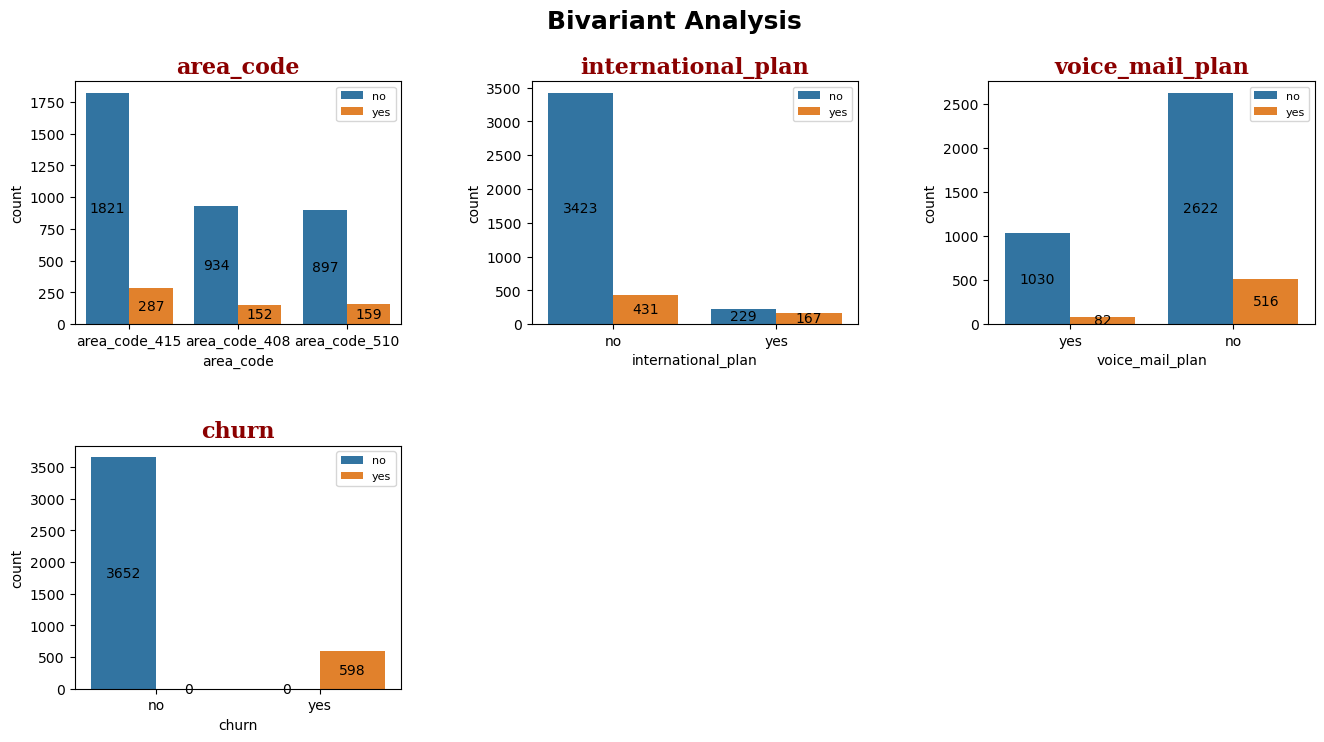

In [11]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = dt[col] , ax=a , hue = dt['churn'] )
    a.set_title(col , fontdict=axtitle_dict)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=8)

### 2.2 Correlation Plott

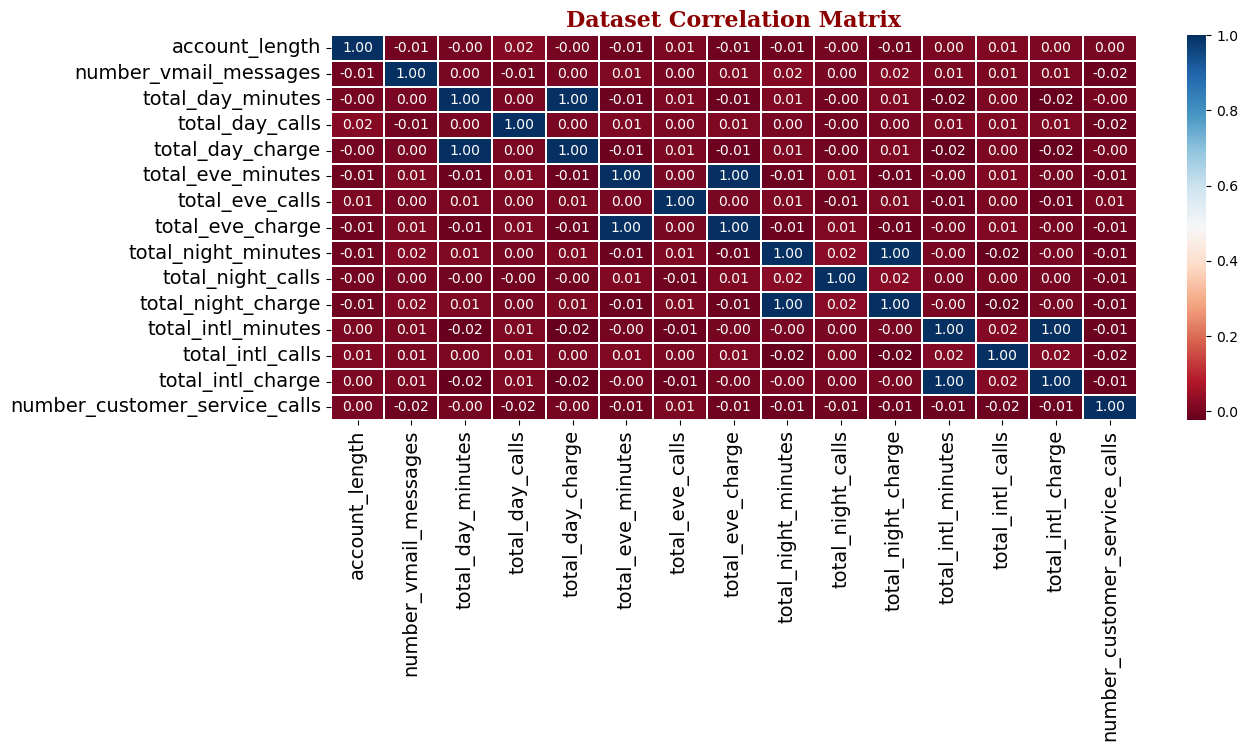

In [12]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(dt.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

### 2.3 Checking Outlier

In [13]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
# numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = dt[numerical]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

number_vmail_messages    True
total_day_minutes        True
total_day_calls          True
total_day_charge         True
total_eve_minutes        True
total_eve_calls          True
total_eve_charge         True
total_night_minutes      True
total_night_calls        True
total_night_charge       True
total_intl_minutes       True
total_intl_calls         True
total_intl_charge        True
dtype: bool

In [14]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

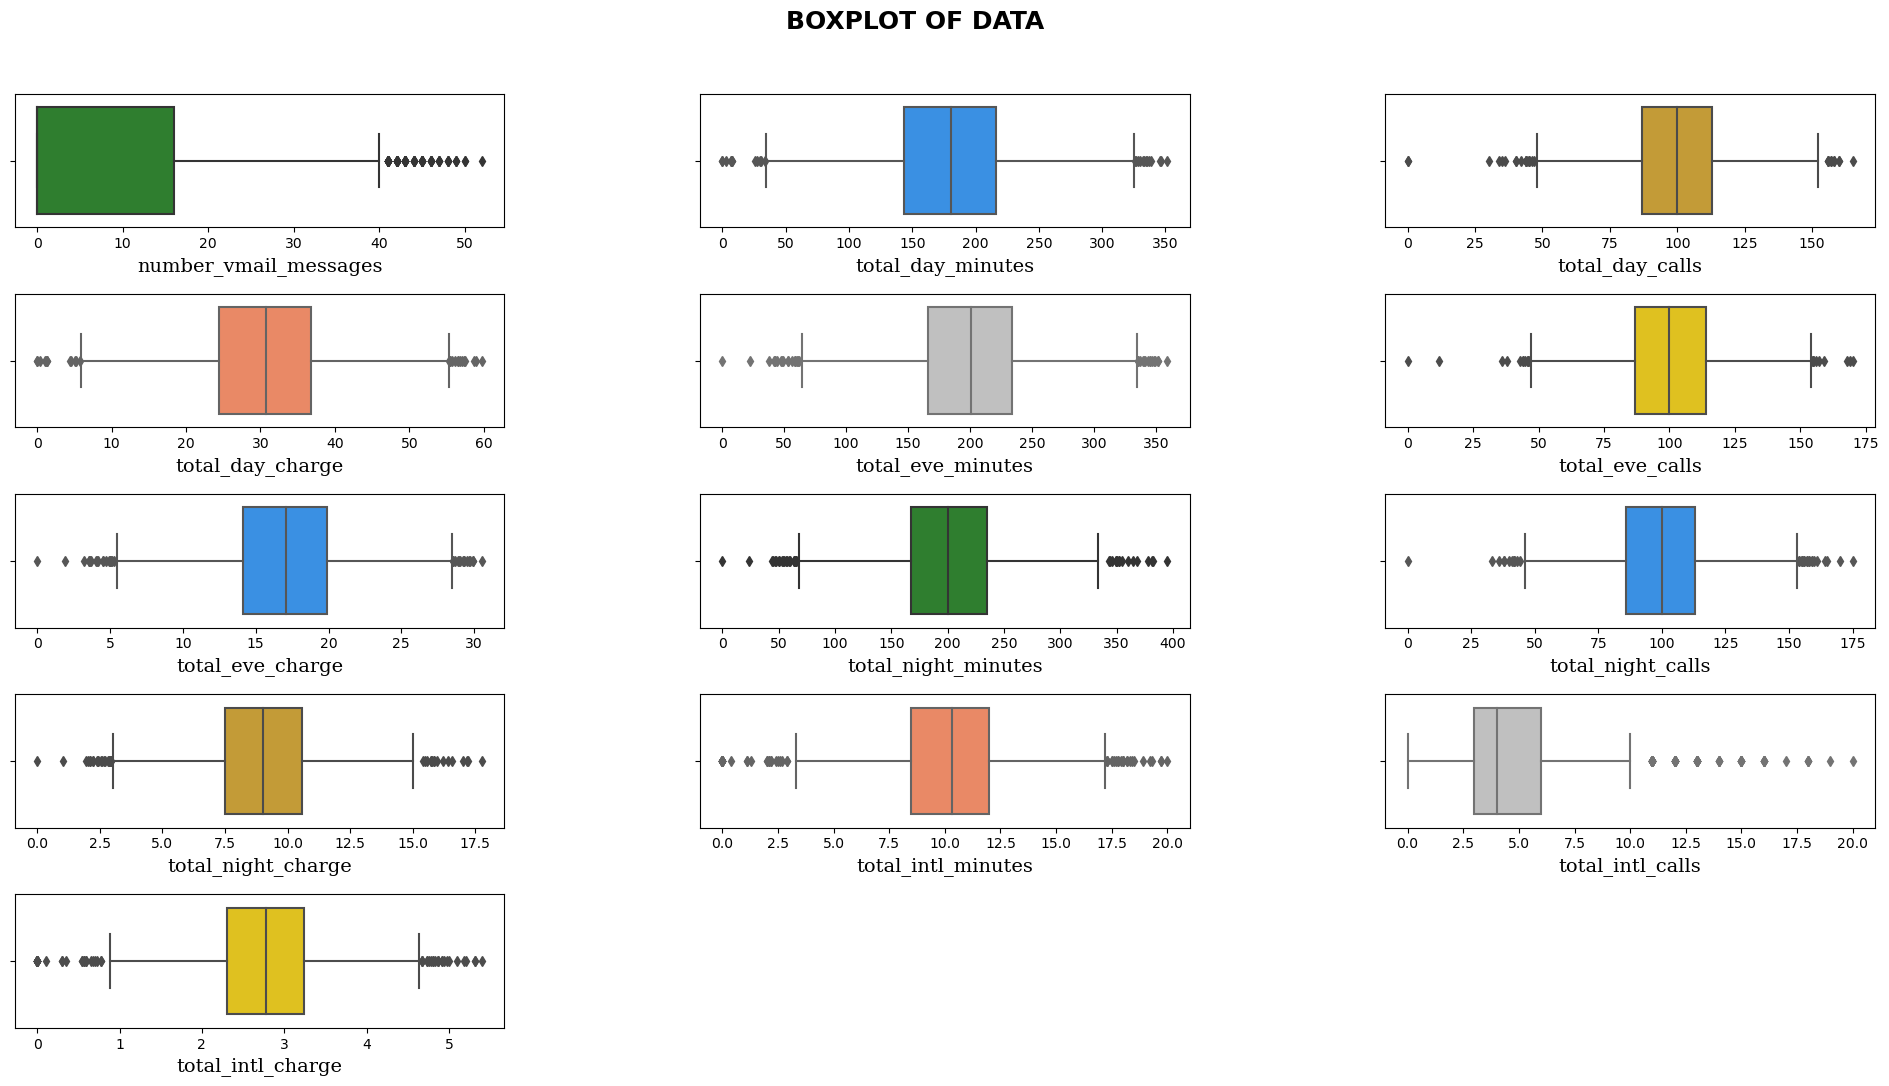

In [15]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[24,14])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = dt, x=col ,  color= colours[i]);
 
  
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

## 3. Data Preprocessing

### 3.1 Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

dt['account_length'] = scaler.fit_transform(dt['account_length'].values.reshape(len(dt),1))
dt['number_vmail_messages'] = scaler.fit_transform(dt['number_vmail_messages'].values.reshape(len(dt),1))
dt['total_day_minutes'] = scaler.fit_transform(dt['total_day_minutes'].values.reshape(len(dt),1))
dt['total_day_calls'] = scaler.fit_transform(dt['total_day_calls'].values.reshape(len(dt),1))
dt['total_day_charge'] = scaler.fit_transform(dt['total_day_charge'].values.reshape(len(dt),1))
dt['total_eve_minutes'] = scaler.fit_transform(dt['total_eve_minutes'].values.reshape(len(dt),1))
dt['total_eve_calls'] = scaler.fit_transform(dt['total_eve_calls'].values.reshape(len(dt),1))
dt['total_eve_charge'] = scaler.fit_transform(dt['total_eve_charge'].values.reshape(len(dt),1))
dt['total_night_minutes'] = scaler.fit_transform(dt['total_night_minutes'].values.reshape(len(dt),1))
dt['total_night_calls'] = scaler.fit_transform(dt['total_night_calls'].values.reshape(len(dt),1))
dt['total_night_charge'] = scaler.fit_transform(dt['total_night_charge'].values.reshape(len(dt),1))
dt['total_intl_minutes'] = scaler.fit_transform(dt['total_intl_minutes'].values.reshape(len(dt),1))
dt['total_intl_calls'] = scaler.fit_transform(dt['total_intl_calls'].values.reshape(len(dt),1))
dt['total_intl_charge'] = scaler.fit_transform(dt['total_intl_charge'].values.reshape(len(dt),1))
dt['number_customer_service_calls'] = scaler.fit_transform(dt['number_customer_service_calls'].values.reshape(len(dt),1))


### 3.2 Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#object_col = [col for col in df.columns if df[col].dtypes == 'object']
#for col in object_col:
for col in [col for col in dt.columns if dt[col].dtypes == 'object']:
    dt[col] = le.fit_transform(dt[col].astype(str))
dt.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,0.438017,1,0,1,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0
1,31,0.561983,1,0,0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0
2,35,0.342975,0,1,0,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0
3,36,0.305785,1,1,0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0
4,19,0.495868,2,0,1,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333,0


In [18]:
dt['state'].unique(),  dt['area_code'].unique(), dt['international_plan'].unique(), dt['voice_mail_plan'].unique(), dt['churn'].unique()

(array([35, 31, 36, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 45, 43,  9,  5,
         3, 40, 50, 11, 30,  0, 10, 20,  2, 48, 37, 22,  8, 44,  4, 41, 27,
        47, 23, 32, 33,  7, 46, 17, 21, 25,  1, 29, 16, 42, 14, 38,  6, 28]),
 array([1, 0, 2]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]))

### 3.3 Data Split

In [19]:
X = dt.drop(['state','area_code','churn'], axis = 1)
y = dt['churn']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Val set:', X_val.shape,  y_val.shape)

Train set: (3400, 17) (3400,)
Val set: (850, 17) (850,)


## 4. Creating Model and Validation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score ,  precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier

In [21]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SupportVectorMachine': SVC(kernel='rbf', probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

In [23]:
# Dictonary to hold models and it's metrics
dict_ensemble_methods_f1= {}
dict_ensemble_methods_acc = {}
dict_ensemble_methods_model = {}

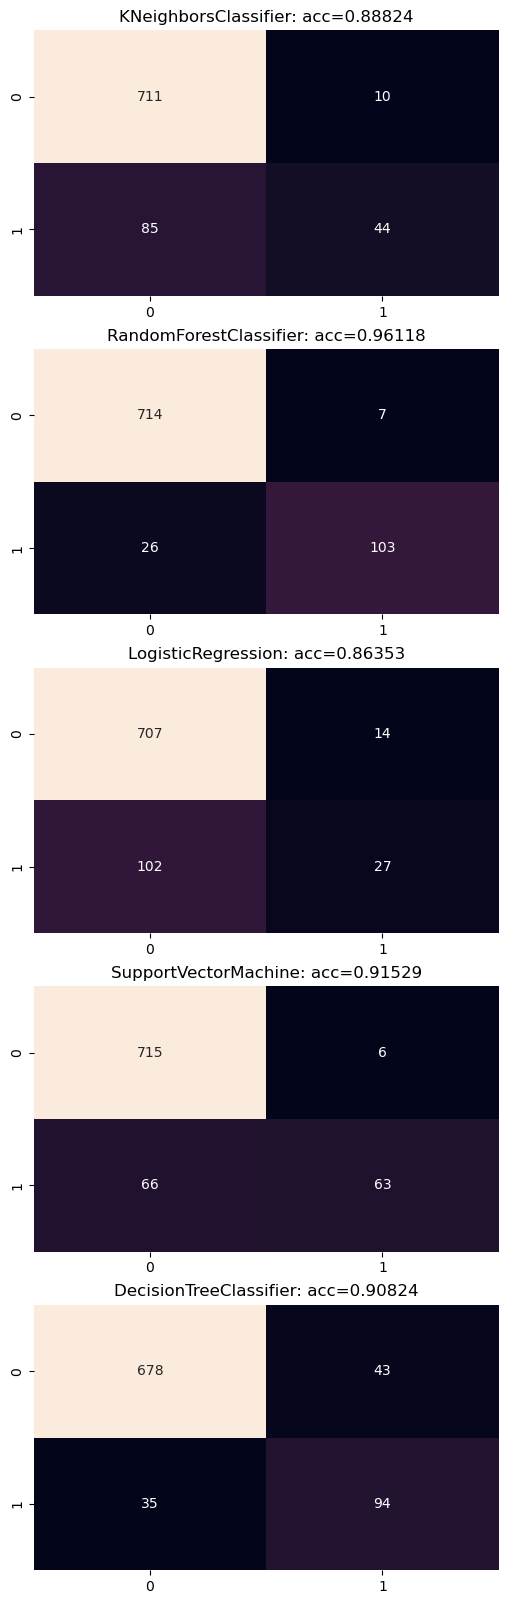

In [25]:
   fig, axs = plt.subplots(len(models), 1, figsize=(6, len(models)*4))
for model_name, i in zip(models, range(len(models))):
    # Load the model obj, fit, predict and calc mse
    model = models[model_name]
    model.fit(
        X_train, 
        y_train )
    res=model.predict(X_val)
    f1=f1_score(y_val, res, average='micro')
    acc=accuracy_score(y_val, res)

    # Load the result into the created dict
    dict_ensemble_methods_f1[model_name]=f1
    dict_ensemble_methods_acc[model_name]=acc
    dict_ensemble_methods_model[model_name]=model
    
    cm=confusion_matrix(y_val, res)

    # Plot results
    axs[i].set_title(f'{model_name}: acc={np.round(acc, 5)}')
    sns.heatmap(ax=axs[i], data=cm, annot=True, fmt='g', cbar=False)
plt.show()

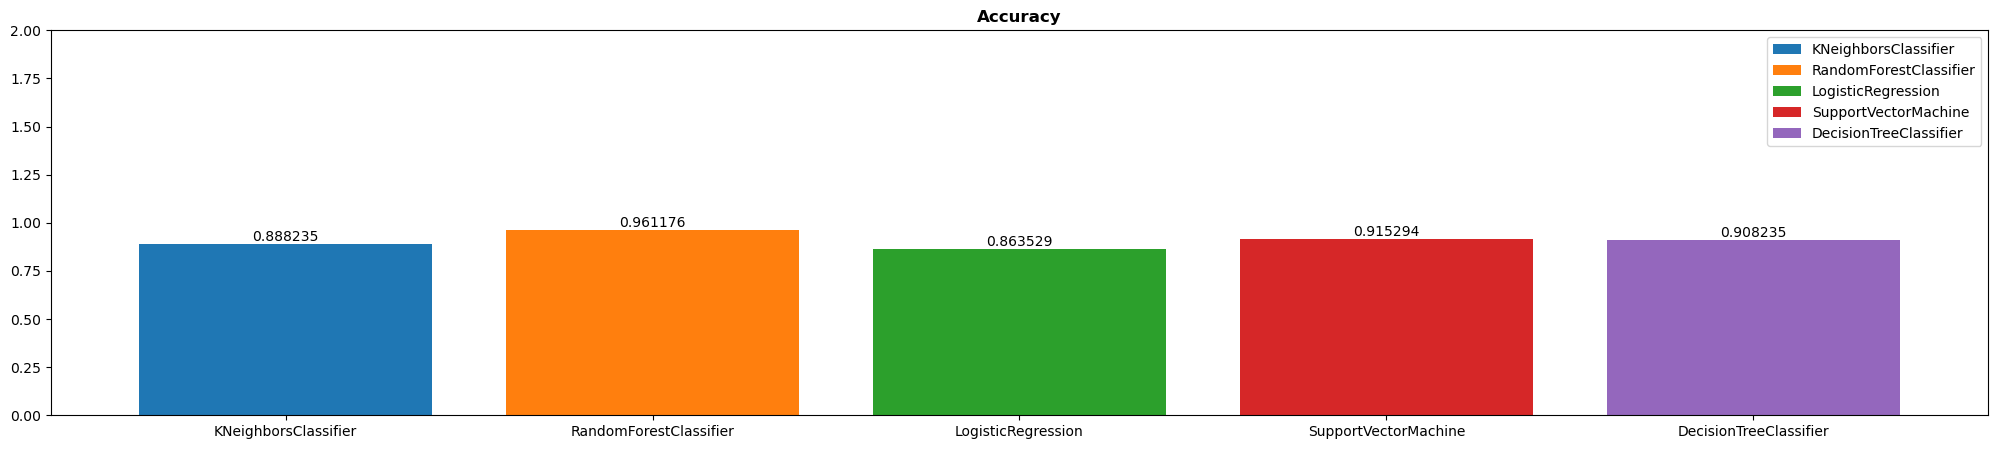

In [26]:
fig, axs = plt.subplots(figsize=(25, 5))
for i in dict_ensemble_methods_acc:
    plt.bar(i, dict_ensemble_methods_acc[i], label=i)
for bars in axs.containers:
    axs.bar_label(bars)
plt.legend(loc='upper right')
axs.set_ylim([0, 2])
plt.title('Accuracy', fontweight="bold")
plt.show()

In [27]:
best_model=dict((v, k) for k, v in dict_ensemble_methods_acc.items()).get(max(dict_ensemble_methods_acc.values()))
best_model

'RandomForestClassifier'

## 5. Testing Model Prediction

In [28]:
dv = pd.read_csv('/kaggle/input/customer-churn-2020/Data Test.csv')
dv.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [29]:
dv.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750.0,375.500000,216.650640,1.00,188.2500,375.500,562.7500,750.00
account_length,750.0,100.385333,39.699029,1.00,74.0000,101.000,126.0000,238.00
number_vmail_messages,750.0,8.454667,14.123712,0.00,0.0000,0.000,21.0000,51.00
total_day_minutes,750.0,180.454933,53.258337,12.50,146.6250,178.200,215.9750,350.80
total_day_calls,750.0,100.721333,19.718539,39.00,88.0000,101.000,114.0000,163.00
total_day_charge,750.0,30.677920,9.053756,2.13,24.9250,30.295,36.7150,59.64
total_eve_minutes,750.0,203.258267,52.185471,31.20,166.8000,203.350,235.9750,363.70
total_eve_calls,750.0,100.273333,19.367535,37.00,87.0000,101.000,113.0000,164.00
total_eve_charge,750.0,17.277080,4.435638,2.65,14.1775,17.285,20.0575,30.91
total_night_minutes,750.0,199.619467,51.531351,50.90,164.4750,199.450,234.8000,364.30


In [30]:
summary_tab(dv)

,Kolom,dataType,null,null_percentage,unique,unique_sample,unique_%
0,id,int64,0,0.0,750,"[252, 234]",100.00
1,state,object,0,0.0,51,"[LA, AZ]",6.80
2,account_length,int64,0,0.0,175,"[148, 154]",23.33
3,area_code,object,0,0.0,3,"[area_code_408, area_code_415]",0.40
4,international_plan,object,0,0.0,2,"[no, yes]",0.27
5,voice_mail_plan,object,0,0.0,2,"[no, yes]",0.27
6,number_vmail_messages,int64,0,0.0,39,"[26, 16]",5.20
7,total_day_minutes,float64,0,0.0,619,"[236.2, 122.2]",82.53
8,total_day_calls,int64,0,0.0,100,"[88, 143]",13.33
9,total_day_charge,float64,0,0.0,619,"[25.6, 36.69]",82.53


In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
dv['account_length'] = scaler.fit_transform(dv['account_length'].values.reshape(len(dv),1))
dv['number_vmail_messages'] = scaler.fit_transform(dv['number_vmail_messages'].values.reshape(len(dv),1))
dv['total_day_minutes'] = scaler.fit_transform(dv['total_day_minutes'].values.reshape(len(dv),1))
dv['total_day_calls'] = scaler.fit_transform(dv['total_day_calls'].values.reshape(len(dv),1))
dv['total_day_charge'] = scaler.fit_transform(dv['total_day_charge'].values.reshape(len(dv),1))
dv['total_eve_minutes'] = scaler.fit_transform(dv['total_eve_minutes'].values.reshape(len(dv),1))
dv['total_eve_calls'] = scaler.fit_transform(dv['total_eve_calls'].values.reshape(len(dv),1))
dv['total_eve_charge'] = scaler.fit_transform(dv['total_eve_charge'].values.reshape(len(dv),1))
dv['total_night_minutes'] = scaler.fit_transform(dv['total_night_minutes'].values.reshape(len(dv),1))
dv['total_night_calls'] = scaler.fit_transform(dv['total_night_calls'].values.reshape(len(dv),1))
dv['total_night_charge'] = scaler.fit_transform(dv['total_night_charge'].values.reshape(len(dv),1))
dv['total_intl_minutes'] = scaler.fit_transform(dv['total_intl_minutes'].values.reshape(len(dv),1))
dv['total_intl_calls'] = scaler.fit_transform(dv['total_intl_calls'].values.reshape(len(dv),1))
dv['total_intl_charge'] = scaler.fit_transform(dv['total_intl_charge'].values.reshape(len(dv),1))
dv['number_customer_service_calls'] = scaler.fit_transform(dv['number_customer_service_calls'].values.reshape(len(dv),1))


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#object_col = [col for col in df.columns if df[col].dtypes == 'object']
#for col in object_col:
for col in [col for col in dv.columns if dv[col].dtypes == 'object']:
    dv[col] = le.fit_transform(dv[col].astype(str))
dv.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,16,0.535865,1,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,2,1,0.493671,2,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,3,12,0.257384,1,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,4,46,0.388186,2,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,5,29,0.729958,1,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000


In [33]:
X = dv.drop(['id','state','area_code'], axis=1)
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.535865,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,0.493671,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,0.257384,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,0.388186,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,0.729958,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000


In [34]:
pred=dict_ensemble_methods_model[best_model].predict(X)
pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [35]:
dpred=pd.DataFrame(pred)
dpred['id']=dv['id']
dpred['churn']=list(pred)
dpred['churn'].replace({0: 'no', 1: 'yes'}, inplace=True)
dpred['churn'].value_counts()
dpred.head()

,0,id,churn
0,0,1,no
1,0,2,no
2,1,3,yes
3,0,4,no
4,1,5,yes


([<matplotlib.patches.Wedge at 0x732c291c8590>,
 [Text(-0.9995054871941272, 0.6640698615874918, 'No Churn'),
  Text(0.9995054871941269, -0.6640698615874924, 'Churn')],
 [Text(-0.5830448675299075, 0.3873740859260369, '81.33%'),
  Text(0.5830448675299073, -0.3873740859260372, '18.67%')])

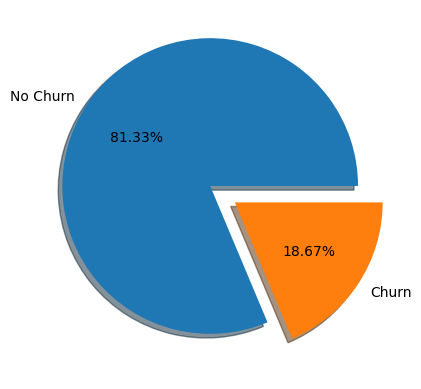

In [36]:
labels = ['No Churn','Churn']
exp = [0.1,0.1]
plt.pie(dpred['churn'].value_counts(),labels=labels,explode=exp,shadow=True,autopct='%1.2f%%')